In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# 1. Data Cleaning


## 1.1 Data Cleaning of Movie Dataset

In [2]:
# Define the path to movie metadata file
file_path_movies = "https://drive.google.com/uc?id=112UVkL35rFTpTvXFAutJs5SfGUHuA3Jn"

# Specify column names
column_names = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date",
                "Movie box office revenue", "Movie runtime", "Movie languages",
                "Movie countries", "Movie genres"]
# Read file into a DataFrame
df_movie = pd.read_csv(file_path_movies, sep='\t', header=None, names=column_names)

In [3]:
# Set "Wikipedia movie ID" column as the index
df_movie = df_movie.set_index("Wikipedia movie ID")

In [4]:
# Define a function to safely evaluate the string representation of a dictionary
def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except (SyntaxError, ValueError):
        return None

# Extract values from the dictionaries in the "Movie languages" column
df_movie["Movie languages"] = df_movie["Movie languages"].apply(lambda x: ', '.join(safe_eval(x).values()) if (isinstance(x, str) and safe_eval(x) is not None) else x)
# Extract values from the dictionaries in the "Movie countries" column
df_movie["Movie countries"] = df_movie["Movie countries"].apply(lambda x: ', '.join(safe_eval(x).values()) if (isinstance(x, str) and safe_eval(x) is not None) else x)
# Extract values from the dictionaries in the "Movie genres" column
df_movie["Movie genres"] = df_movie["Movie genres"].apply(lambda x: ', '.join(safe_eval(x).values()) if (isinstance(x, str) and safe_eval(x) is not None) else x)


In [5]:
df_movie.head()

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
Wikipedia movie ID,,,,,,,,
975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"Crime Fiction, Drama"
9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,Drama


## 1.2 Data Cleaning of Character Metadata file

In [6]:
# Define the path to movie metadata file
file_path_characters = "https://drive.google.com/uc?id=1fC4M6awWZVzVD96VROx4OGoE8gNu_Kkf"

In [7]:
# Read the TSV file into a DataFrame
df_characters = pd.read_csv(file_path_characters, sep='\t', header=None)

In [8]:
# Remove the last three columns
df_characters = df_characters.iloc[:, :-3]

In [9]:
# Define new column names
column_names = [
    "Wikipedia movie ID",
    "Freebase movie ID",
    "Movie release date",
    "Character Name",
    "Actor DOB",
    "Actor gender",
    "Actor height",
    "Actor ethnicity",
    "Actor Name",
    "Actor age at movie release",  
]


# Rename the columns
df_characters.columns = column_names

In [10]:
df_characters.head()

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor Name,Actor age at movie release
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0


# 2. Data Exploration

We check what data is available and what data is not.

Text(0.5, 0.98, 'Heatmaps of missing values in the data')

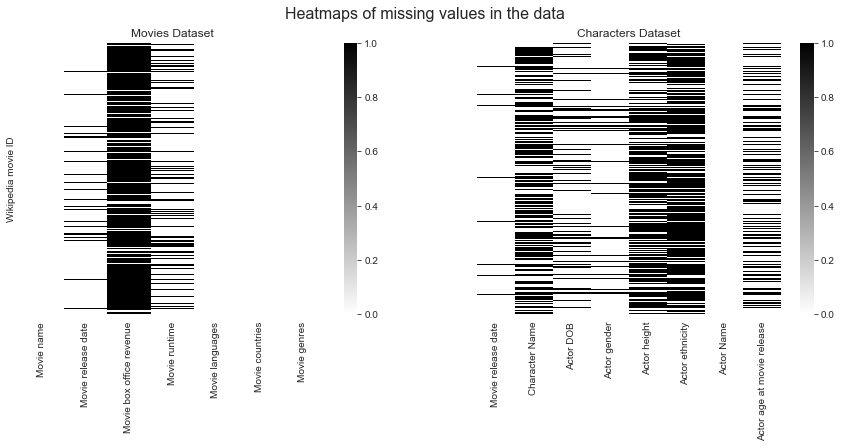

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# use of heatmaps for missing data illustration
movies = df_movie.copy()
movies.drop(columns=["Freebase movie ID"], inplace=True)
sns.heatmap(movies.isna(), cmap="binary", yticklabels=False, ax=axs[0])
axs[0].title.set_text("Movies Dataset")

characters = df_characters.copy()
characters.drop(columns=["Wikipedia movie ID", "Freebase movie ID"], inplace=True)
sns.heatmap(characters.isna(), cmap="binary", yticklabels=False, ax=axs[1])
axs[1].title.set_text("Characters Dataset")

fig.suptitle("Heatmaps of missing values in the data", fontsize=16)
# possibility to save the figure
# fig.savefig("heatmaps_data.png", dpi=300, bbox_inches="tight")

# 3. Data Combination

In [12]:
# Drop the redundant release date column from characters database
df_characters = df_characters.drop('Movie release date', axis=1)

# Merge the two DataFrames on the common key "Freebase Movie ID"
merged_df = pd.merge(df_movie, df_characters, how='left', left_on='Freebase movie ID', right_on='Freebase movie ID')

# Display the merged DataFrame
merged_df.head()

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Wikipedia movie ID,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor Name,Actor age at movie release
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",975900.0,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0
1,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",975900.0,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0
2,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",975900.0,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0
3,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",975900.0,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0
4,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",975900.0,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0


In [13]:
merged_df.describe()

,Movie box office revenue,Movie runtime,Wikipedia movie ID,Actor height,Actor age at movie release
count,1.012060e+05,4.101390e+05,4.506690e+05,154824.000000,292556.000000
mean,6.930244e+07,1.275942e+02,1.396975e+07,1.788893,37.788523
std,1.468521e+08,5.328966e+03,1.079662e+07,4.379940,20.587870
min,1.000000e+04,0.000000e+00,3.300000e+02,0.610000,-7896.000000
25%,3.588602e+06,8.800000e+01,3.759292e+06,1.676400,28.000000
50%,1.776876e+07,9.700000e+01,1.189065e+07,1.750000,36.000000
75%,6.650257e+07,1.120000e+02,2.366501e+07,1.830000,47.000000
max,2.782275e+09,1.079281e+06,3.750192e+07,510.000000,103.000000


In [14]:
# Group by movie information and aggregate character information
aggregated_df = merged_df.groupby(['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'], as_index=False).agg(lambda x: ', '.join(x.dropna().astype(str)))

# Display the aggregated DataFrame
aggregated_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor Name,Actor age at movie release
0,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...","1965-12-14, 1956, 1958-06-22, 1958-06-22, 1965...","M, M, M, M, M, F, F, F, M, M, M, M, M","1.87, 1.85, 1.85, 1.87, 1.68, 1.73, 1.75, 1.87...","/m/07hwkr, /m/06v41q","Ted Raimi, Ivan Raimi, Bruce Campbell, Bruce C...","26.0, 36.0, 34.0, 34.0, 26.0, 28.0, 27.0, 35.0..."
1,3333.0,/m/0151l,The Birth of a Nation,1915,50000000.0,190.0,"Silent film, English Language",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",,"1893-10-14, 1878-03-16, 1894-11-09, 1868-04-16...","F, M, F, M, M, F, M, M, M, M, F, F, F, M","1.66, 1.6, 1.8, 1.6",/m/07bch9,"Lillian Gish, Henry B. Walthall, Mae Marsh, Sp...",11.0
2,3746.0,/m/017n9,Blade Runner,1982-06-25,33139618.0,116.0,"Japanese Language, Cantonese, English Language...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...","J.F. Sebastian, Rick Deckard, Roy Batty, Racha...","1948-01-10, 1942-07-13, 1944-01-23, 1959-11-20...","M, M, M, F, F, F, M, M, M, M, M, M, M, M","1.727, 1.85, 1.85, 1.753, 1.78, 1.753, 1.905, ...","/m/01qhm_, /m/05l3g_, /m/01g7zj, /m/01336l","William Sanderson, Harrison Ford, Rutger Hauer...","34.0, 39.0, 38.0, 22.0, 21.0, 36.0, 37.0, 37.0..."
3,3837.0,/m/018f8,Blazing Saddles,1974-02-07,119500000.0,93.0,"Yiddish Language, English Language",United States of America,"Western, Satire, Comedy","Gabby Johnson, Taggart, Rev. Johnson, Mongo, B...","1936-11-02, 1919-06-29, 1910-02-02, 1916-11-12...","M, M, M, M, M, M, M, M, M, F, M, M, M, M, F, M...","1.91, 1.7, 1.88, 1.78, 1.65, 1.6, 1.7, 1.91, 1...","/m/0xnvg, /m/09kr66, /m/041rx, /m/041rx, /m/04...","Jack Starrett, Slim Pickens, Dave Sharpe, Liam...","37.0, 54.0, 64.0, 57.0, 38.0, 40.0, 43.0, 35.0..."
4,3947.0,/m/0191n,Blue Velvet,1986-08,8551228.0,120.0,English Language,United States of America,"Thriller, Mystery, Crime Fiction","Don Vallens, Dorothy Vallens, Jeffrey Beaumont...","1952-06-18, 1959-02-22, 1936-05-17, 1967-02-10...","M, F, M, M, F, F, M, M, F, F, M, M, M, M, M","1.73, 1.83, 1.75, 1.79, 1.57, 1.68, 1.75","/m/065b6q, /m/07bch9, /m/07hwkr","Dick Green, Isabella Rossellini, Kyle MacLachl...",


In [15]:
aggregated_df.describe()

,Wikipedia movie ID,Movie box office revenue,Movie runtime
count,8.093000e+03,8.093000e+03,8093.000000
mean,8.563176e+06,4.911942e+07,105.876523
std,9.778647e+06,1.135615e+08,23.553374
min,3.217000e+03,1.000000e+04,10.000000
25%,1.166096e+06,2.228951e+06,93.000000
50%,3.823023e+06,1.115521e+07,102.000000
75%,1.371324e+07,4.231335e+07,115.000000
max,3.695679e+07,2.782275e+09,1003.000000


# 4. Feature Engineering on an Aggregate Basis

## 4.1 Extra manipulation on aggregated_df to optimize variable creation

In [16]:
release_date = pd.DataFrame(pd.concat((aggregated_df["Wikipedia movie ID"], aggregated_df["Movie release date"].str.split("-", expand=True)), axis=1))
release_date.columns = ["Wikipedia movie ID", "Year", "Month", "Day"]
release_date["Year"] = release_date["Year"].apply(lambda x: int(x))
release_date["Month"] = release_date["Month"].apply(lambda x: int(x.lstrip("0")) if x is not None else None)
release_date["Day"] = release_date["Day"].apply(lambda x: int(x.lstrip("0")) if x is not None else None)

aggregated_df = pd.merge(aggregated_df, release_date, how='left', on='Wikipedia movie ID')
aggregated_df.describe()

,Wikipedia movie ID,Movie box office revenue,Movie runtime,Year,Month,Day
count,8.093000e+03,8.093000e+03,8093.000000,8093.000000,6793.000000,6620.000000
mean,8.563176e+06,4.911942e+07,105.876523,1990.835537,6.791256,15.760725
std,9.778647e+06,1.135615e+08,23.553374,22.334944,3.456400,8.473513
min,3.217000e+03,1.000000e+04,10.000000,1010.000000,1.000000,1.000000
25%,1.166096e+06,2.228951e+06,93.000000,1984.000000,4.000000,9.000000
50%,3.823023e+06,1.115521e+07,102.000000,1997.000000,7.000000,16.000000
75%,1.371324e+07,4.231335e+07,115.000000,2006.000000,10.000000,23.000000
max,3.695679e+07,2.782275e+09,1003.000000,2012.000000,12.000000,31.000000


In [17]:
# preventive data cleaning: drop the release date that is 1010 and keep the rest
aggregated_df = aggregated_df[aggregated_df["Year"] >= 1897]

## 4.2 Generating Median Runtime

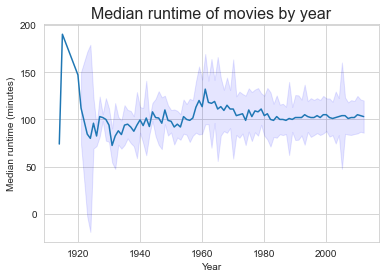

In [18]:
# Combine the movies to get an aggregate median runtime for the whole dataset
#fig = plt.figure()

median_runtime_year = aggregated_df.groupby("Year")["Movie runtime"]
sns.lineplot(data=median_runtime_year.median())
plt.xlabel("Year")
plt.ylabel("Median runtime (minutes)")
plt.title("Median runtime of movies by year", fontsize=16)

plt.fill_between(median_runtime_year.median().index,
                 median_runtime_year.median() - median_runtime_year.std(),
                 median_runtime_year.median() + median_runtime_year.std(),
                 color='blue', alpha=0.1)

#fig.savefig("movie_runtime_by_year.png", dpi=300, bbox_inches="tight")
#fig.clear()

## 4.3 Grouping movies into Umbrella Genres

This is done in order to make analysis by genre easier, as there are too many specific genres to study them all.

### Create a movie genre variable

In [19]:
# Assuming the "Movie genres" column contains a list of genres separated by commas
aggregated_df['Movie Genre'] = aggregated_df['Movie genres'].str.split(',').str[0].str.strip()

### Let us first study the Genre Column

In [20]:
# List of all genres
all_genres = set(aggregated_df['Movie genres'].str.split(',').explode().str.strip().str.lower())

# Sort the list alphabetically
sorted_genres = sorted(all_genres)
print("All possible genres:")
print(sorted_genres)

All possible genres:
['', 'absurdism', 'acid western', 'action', 'action comedy', 'action thrillers', 'action/adventure', 'addiction drama', 'adult', 'adventure', 'adventure comedy', 'airplanes and airports', 'albino bias', 'alien film', 'alien invasion', 'americana', 'animal picture', 'animals', 'animated cartoon', 'animated musical', 'animation', 'anime', 'anthology', 'anthropology', 'anti-war', 'anti-war film', 'apocalyptic and post-apocalyptic fiction', 'archaeology', 'archives and records', 'art film', 'auto racing', 'avant-garde', 'b-movie', 'b-western', 'backstage musical', 'baseball', 'beach film', 'biker film', 'biographical film', 'biography', 'biopic [feature]', 'black comedy', 'black-and-white', 'blaxploitation', 'bloopers & candid camera', 'bollywood', 'boxing', 'breakdance', 'british empire film', 'british new wave', 'buddy cop', 'buddy film', 'business', 'camp', 'caper story', 'cavalry film', 'chase movie', 'childhood drama', "children's", "children's fantasy", "children

In [21]:
# total number of genres
unique_genres = set(aggregated_df['Movie genres'].str.split(',').explode().str.strip())

total_genre_count = len(unique_genres)

print("Total number of unique genres:", total_genre_count)

Total number of unique genres: 311


In [22]:
# Create a new column "Number of Genres" with the count of genres for each movie
aggregated_df['Number of Genres'] = aggregated_df['Movie genres'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)

# Display the modified DataFrame
aggregated_df[['Movie name', 'Movie genres', 'Number of Genres']].head()

,Movie name,Movie genres,Number of Genres
0,Army of Darkness,"Cult, Horror, Stop motion, Costume drama, Acti...",12
1,The Birth of a Nation,"Silent film, Indie, Costume drama, Epic, Black...",7
2,Blade Runner,"Thriller, Cyberpunk, Science Fiction, Future n...",12
3,Blazing Saddles,"Western, Satire, Comedy",3
4,Blue Velvet,"Thriller, Mystery, Crime Fiction",3


In [23]:
# Calculate the mean and variance of the number of genres per movie
mean_num_genres = aggregated_df['Number of Genres'].mean()
variance_num_genres = aggregated_df['Number of Genres'].var()

print("Mean number of genres per movie:", mean_num_genres)
print("Variance of the number of genres per movie:", variance_num_genres)

Mean number of genres per movie: 5.149036085022244
Variance of the number of genres per movie: 5.783001171852439


### We want to look  at the distribution of the movies in the different genre categories
#### i. Manually create umbrella categories.
#### ii. Reassign each genre to their umbrella genre, if no umbrella genre assign to miscellanous genre named 'other'
#### iii. Create a pie chart for genres distribution

In [24]:
#Children and Family Movies
family_children_genres = [
    genre for genre in all_genres if 
    "children's" in genre.lower() or 
    "children's entertainment" in genre.lower() or 
    "children's fantasy" in genre.lower() or 
    "children's/family" in genre.lower() or 
    'fairy tale' in genre.lower() or 
    'family & personal relationships' in genre.lower() or 
    'family drama' in genre.lower() or 
    'family film' in genre.lower() or 
    'family-oriented adventure' in genre.lower()
]

# Drama
drama_genres = [genre for genre in all_genres if 'drama' in genre.lower()]

# Comedy
comedy_genres = [genre for genre in all_genres if 'comedy' in genre.lower() or 'comdedy' 
                 in genre.lower() or 'mock' in genre.lower() or 'parody' in genre.lower() 
                 or 'humour' in genre.lower() or 'slapstick' in genre.lower()
                 or 'bud' in genre.lower() or 'chick flick' in genre.lower()]

#Pornographic Movies
pornographic_genres = [ genre for genre in all_genres if 
    'erotic thriller' in genre.lower() or 
    'sexploitation' in genre.lower() or 
    'pinku eiga' in genre.lower() or 
    'gay pornography' in genre.lower() or 
    'softcore porn' in genre.lower() or 
    'pornography' in genre.lower() or 
    'adult' in genre.lower() or 'hardcore pornography' in genre.lower() or 
    'pornographic movie' in genre.lower()
]

# Science fiction & Fantasy
SF_and_Fantasy_genres = [
    genre for genre in all_genres if 'sci-fi' in genre.lower() 
    or 'science fiction' in genre.lower() 
    or 'sci fi' in genre.lower() 
    or 'fiction' in genre.lower() 
    or 'apocalyptic' in genre.lower() 
    or 'fantasy' in genre.lower() 
    or 'vampire' in genre.lower() 
    or 'zombie' in genre.lower() 
    or 'werewolf' in genre.lower() 
    or 'space' in genre.lower()
    or 'supernatural' in genre.lower()
    or 'monster' in genre.lower()
    or 'sword and sorcery' in genre.lower()
    or 'steampunk' in genre.lower()
    or 'cyberpunk' in genre.lower()
    or 'Wuxia' in genre.lower()
    or 'Alien' in genre.lower()
    or 'hero' in genre.lower()
    or 'dystopia' in genre.lower()
    or 'time travel' in genre.lower()
    or 'creature' in genre.lower()
    or 'doomsday' in genre.lower()
    or 'plague' in genre.lower()  
]

# Action/ Adventure movies
action_genres = [genre for genre in all_genres if 'action' in genre.lower()
                 or 'combat' in genre.lower() or 'swashbuckler films' in genre.lower()
                 or 'adventure' in genre.lower() or 'martial' in genre.lower()
                 or 'jungle' in genre.lower()  or  'bruceploitation' in genre.lower()
                 or 'escape' in genre.lower() or 'chase' in genre.lower()
                 or 'heist' in genre.lower() or 'epic' in genre.lower()
                 or 'caper' in genre.lower() or 'gladiator' in genre.lower()
                 or 'tokusatsu' in genre.lower() or 'samurai' in genre.lower()
                 or 'ninja' in genre.lower() or 'gangster' in genre.lower()]

# Horror movies
horror_genres = [genre for genre in all_genres if 'horror' in genre.lower()
                         or 'slasher' in genre.lower() or 'spaltter' in genre.lower()
                         or 'giallo' in genre.lower() or 'gross' in genre.lower()
                         or 'demonic' in genre.lower() or 'haunted' in genre.lower()]

# Thrillers
thriller_genres = [genre for genre in all_genres if 'thriller' in genre.lower() 
                            or 'suspense' in genre.lower() or 'psycho-biddy' in genre.lower()
                            or 'whodunit' in genre.lower() or 'crime' in genre.lower()]

# LGBT & Social justice
lgbt_and_social_justice_genres = [genre for genre in all_genres if 'lgbt' in genre.lower() 
               or 'gay' in genre.lower() or 'gay interest' in genre.lower() 
               or 'gay themed' in genre.lower() or 'gender issues' in genre.lower()
               or 'social' in genre.lower() or 'feminist' in genre.lower()
               or 'illnesses' in genre.lower() or 'queer' in genre.lower() or 'issues' in genre.lower()
               or 'rape' in genre.lower()]

# Teen movie
teen_genres = [genre for genre in all_genres if 'teen' in genre.lower()
                             or 'coming of age' in genre.lower() or 'school' in genre.lower()]

# Romance
romantic_genres = [genre for genre in all_genres if 'romantic' in genre.lower() or 'romance' in genre.lower()]

# Prison Movies
prison_genres = [genre for genre in all_genres if 'prison' in genre.lower()]

# Spy
spy_detective_genres = [genre for genre in all_genres if 'spy' in genre.lower() 
                        or 'detective' in genre.lower() or 'espionage' in genre.lower()]

#Musical
musical_genres = [genre for genre in all_genres if 'musical' in genre.lower() 
                  or 'music' in genre.lower() or 'hip hop' in genre.lower()
                  or 'theatrical' in genre.lower() or 'roadshow' in genre.lower()
                  or 'breakdance' in genre.lower() or 'dance' in genre.lower()
                  or 'opera' in genre.lower() or 'play' in genre.lower() 
                  or 'rockumentary' in genre.lower()]

# Alternative Medium
alternative_medium_genres = [genre for genre in all_genres if 'anime' in genre.lower() 
                             or 'animation' in genre.lower() or '3d' in genre.lower() 
                             or 'animated' in genre.lower() or 'stop motion' in genre.lower() 
                             or 'clay motion' in genre.lower() or 'supermarionation' in genre.lower()
                            or 'point of view' in genre.lower() or 'anthology' in genre.lower()]

#Western
western_genres = [genre for genre in all_genres if 'western' in genre.lower() 
                            or 'americana' in genre.lower() or 'cowboy' in genre.lower()
                            or 'cavalry' in genre.lower() or 'outlwaw' in genre.lower()]

# War movies
war_genres = [genre for genre in all_genres if 'war' in genre.lower() 
              or 'foreign legion' in genre.lower() or 'patriotic' in genre.lower() 
              or 'political' in genre.lower() or 'propaganda' in genre.lower() 
              or 'nuclear' in genre.lower() or 'military' in genre.lower()]

# Religious movies
religious_genres = [genre for genre in all_genres if 'religion' in genre.lower()
                    or 'religious' in genre.lower() or 'christian' in genre.lower() 
                    or 'hagiography' in genre.lower()]

# World cinema
world_cinema_genres = [genre for genre in all_genres if 'world' in genre.lower() 
                       or 'bengali' in genre.lower() or 'chinese' in genre.lower() 
                       or 'filipino' in genre.lower() or 'japanese' in genre.lower() 
                       or 'tollywood' in genre.lower() or 'latino' in genre.lower() 
                       or 'malayalam' in genre.lower() or 'mondo' in genre.lower()
                       or 'czech' in genre.lower() or 'bollywood' in genre.lower()]

# Educational Genre
educational_genres = [genre for genre in all_genres if 'news' in genre.lower() 
                      or 'nature' in genre.lower() or 'media' in genre.lower() 
                      or 'documentary' in genre.lower() or 'animals' in genre.lower()
                      or 'culture' in genre.lower() or 'society' in genre.lower()
                      or 'education' in genre.lower()  or 'anthropology' in genre.lower()
                       or 'archaeology' in genre.lower()]

# Historical
historical_genres = [genre for genre in all_genres if 'history' in genre.lower()
                     or 'period' in genre.lower() or 'empire' in genre.lower()]

# Niche Genre and Low budget movies
niche_low_budget_genres = [genre for genre in all_genres
                           if 'absurdism' in genre.lower() 
                           or'surrealism' in genre.lower() or 'kafka' in genre.lower()
                           or 'existentialism' in genre.lower() or 'applied art' in genre.lower() 
                           or 'avant-garde' in genre.lower() or 'new wave' in genre.lower() 
                           or 'dogme 95' in genre.lower() or 'fan ' in genre.lower() 
                           or 'experimental' in genre.lower() or 'exploitation' in genre.lower() 
                           or 'indie' in genre.lower()  
                           or 'realism' in genre.lower() or 'b-' in genre.lower() 
                           or 'c-' in genre.lower() or 'z ' in genre.lower()]

# Early and older genre
older_genres = [genre for genre in all_genres if 'silent' in genre.lower() or 'black-and-white' in genre.lower() or 'goat' in genre.lower() or 'new hollywood' in genre.lower() or 'pre-code' in genre.lower() or 'noir' in genre.lower()]

# Remake
remake_reboot_genres = [genre for genre in all_genres if 'remake' in genre.lower() or 'reboot' in genre.lower()]

# Business & Finance
business_genres = [genre for genre in all_genres if 'business' in genre.lower() or 'finance' in genre.lower()]

### Additional genre combination

As we still have quite many umbrella genres, we decided to combine some of those into larger categories in order to be able to run a category analysis with less variables.

We made the arbitrary qualitative choice of storing most of the smaller genres as Niche/Other, in order to reduce efficiently the amount of genres and make our analysis easier later on.

In [25]:
# Combination of previous lists into more specific ones
niche_genres = niche_low_budget_genres + older_genres + educational_genres + religious_genres + lgbt_and_social_justice_genres + alternative_medium_genres + business_genres +pornographic_genres + remake_reboot_genres
action_genres = action_genres + spy_detective_genres + western_genres
war_historical_genres = historical_genres + war_genres
family_children_teen_genres = family_children_genres + teen_genres

In [26]:
# Define umbrella genres
umbrella_genres = [
    family_children_teen_genres, drama_genres, comedy_genres, SF_and_Fantasy_genres,
    action_genres, horror_genres, thriller_genres, romantic_genres,
    musical_genres, world_cinema_genres, war_historical_genres, niche_genres 
]
# Count the total number of umbrella genres
total_umbrella_genres = len(umbrella_genres)

# Display the total number of umbrella genres
print(f"Total number of umbrella genres: {total_umbrella_genres}")

Total number of umbrella genres: 12


In [27]:
def assign_umbrella_genre(genre_list):
    return_list = []
    for genre in genre_list.split(","):
        genre = genre.strip().lower()
        found = False
        for genre_keywords, umbrella_genre in zip(umbrella_genres, umbrella_genre_names):
            if genre in genre_keywords:
                found = True
                return_list.append(umbrella_genre)
                break
        # If no match is found, return 'Niche/Other'
        if not found:
            return_list.append('Niche/Other')
    # Avoid duplicates with set()
    return list(set(return_list))


umbrella_genre_names = [
    'Family/Children/Teen', 'Drama', 'Comedy', 'SF and Fantasy',
    'Action', 'Horror', 'Thriller', 'Romantic',
    'Musical', 'World Cinema', 'Historical/War', 'Niche/Other'
]

In [28]:
# Apply the categorize_genre function to create a new column "Umbrella Genre" (also to merged_df in case we require it)
aggregated_df['Umbrella Genre'] = aggregated_df['Movie genres'].apply(assign_umbrella_genre)
merged_df['Umbrella Genre'] = merged_df['Movie genres'].apply(assign_umbrella_genre)

# Display the modified DataFrame
aggregated_df[['Movie genres', 'Umbrella Genre']].head()

,Movie genres,Umbrella Genre
0,"Cult, Horror, Stop motion, Costume drama, Acti...","[Drama, SF and Fantasy, Niche/Other, Comedy, A..."
1,"Silent film, Indie, Costume drama, Epic, Black...","[Historical/War, Drama, Niche/Other, Action]"
2,"Thriller, Cyberpunk, Science Fiction, Future n...","[Drama, SF and Fantasy, World Cinema, Niche/Ot..."
3,"Western, Satire, Comedy","[Comedy, Niche/Other, Action]"
4,"Thriller, Mystery, Crime Fiction","[SF and Fantasy, Niche/Other, Thriller]"


In [29]:
# Calculate the count of movies for each genre
genre_counts = aggregated_df['Umbrella Genre'].explode().str.strip().value_counts()

# Calculate the percentage of movies for each genre
genre_percentages = genre_counts / len(aggregated_df) * 100

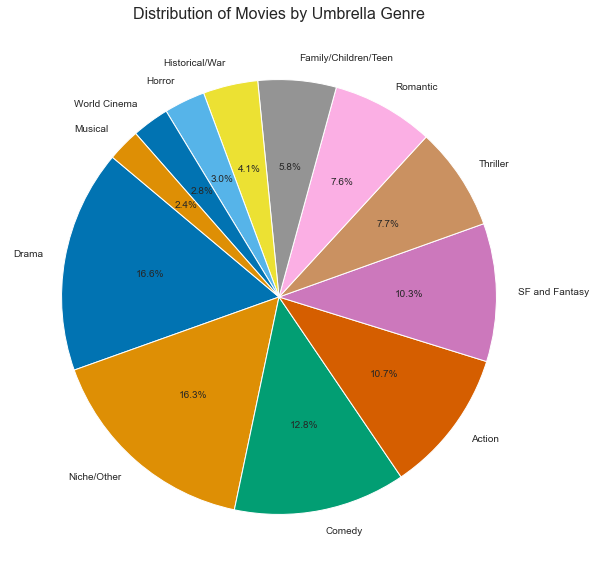

In [30]:
# Plot a pie chart

colors = sns.color_palette("colorblind")

plt.figure(figsize=(10, 10))
plt.pie(genre_percentages, labels=genre_percentages.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Movies by Umbrella Genre', fontdict={'fontsize': 16})
plt.show()

# 5. Creating actor-related variables

## 5.1 Creating a Type Casting variable for actors

In [31]:
# Step 1: Count the total number of movies each actor is in (sanity check with DOB to avoid issues with twice the same name)
actor_movie_counts = merged_df[['Actor Name', 'Actor DOB']].value_counts().reset_index()
actor_movie_counts.columns = ['Actor Name', 'Actor DOB', 'Total Movies']

# Merge the actor_movie_counts back into the original DataFrame
merged_df = pd.merge(merged_df, actor_movie_counts, how='left', on=['Actor Name', 'Actor DOB'])

In [32]:
# Step 2: Discard actors with movie counts less than 10
merged_df_filtered = merged_df[merged_df['Total Movies'] >= 10]

# Display the modified DataFrame
merged_df_filtered[['Actor Name', 'Total Movies']].head()

,Actor Name,Total Movies
1,Natasha Henstridge,23.0
2,Ice Cube,33.0
3,Jason Statham,31.0
4,Clea DuVall,31.0
5,Pam Grier,44.0


In [33]:
# Step 3: Create a DataFrame with the count of movies for each actor in each genre
merged_df_exploded = merged_df_filtered.explode("Umbrella Genre")
actor_genre_counts = merged_df_exploded.groupby(['Actor Name', 'Actor DOB', 'Umbrella Genre']).size().reset_index(name='Movie Count')

# Step 4: Calculate the percentage of movies in each genre for each actor
actor_genre_counts['Percentage'] = actor_genre_counts['Movie Count'] / actor_genre_counts.groupby(['Actor Name', 'Actor DOB'])['Movie Count'].transform('sum') * 100

# Display the modified DataFrame
actor_genre_counts.head()

,Actor Name,Actor DOB,Umbrella Genre,Movie Count,Percentage
0,50 Cent,1975-07-06,Action,11,16.666667
1,50 Cent,1975-07-06,Comedy,2,3.030303
2,50 Cent,1975-07-06,Drama,15,22.727273
3,50 Cent,1975-07-06,Family/Children/Teen,1,1.515152
4,50 Cent,1975-07-06,Historical/War,2,3.030303


In [34]:
# Step 5: Create a boolean variable for typecasting based on the conditions
actor_genre_counts['Typecasting'] = (actor_genre_counts['Movie Count'] >= 4) & (actor_genre_counts['Percentage'] >= 50)

In [35]:
# Count the number of actors with Typecasting = True
typecasting_actors_count = actor_genre_counts[actor_genre_counts['Typecasting']].groupby(['Actor Name', 'Actor DOB', 'Umbrella Genre']).size().reset_index(name='Typecasting Actors Count')

typecasting_actors_count.head()

,Actor Name,Actor DOB,Umbrella Genre,Typecasting Actors Count
0,Adelqui Migliar,1891-08-05,Niche/Other,1
1,Adriano Celentano,1938-01-06,Comedy,1
2,Akkineni Nageswara Rao,1924-09-20,Drama,1
3,Al Thompson,1884-09-21,Niche/Other,1
4,Alice Terry,1899-07-29,Niche/Other,1


In [36]:
# Add this new information to merged_df
merged_df = pd.merge(merged_df, actor_genre_counts[['Actor Name', 'Actor DOB', 'Typecasting']], how='left', on=['Actor Name', 'Actor DOB'])

## 5.2 Creation of actor popularity variable

In [37]:
# We use the merged DF, as we need all individual actor-movie pairs
merged_df['Year'] = pd.to_numeric(merged_df['Movie release date'].str.extract(r'(\d{4})')[0], errors='coerce')

# As there is an issue with one of the movie release dates (1010 according to the database) so we discard this one
merged_df = merged_df[merged_df['Year'] >= 1897]

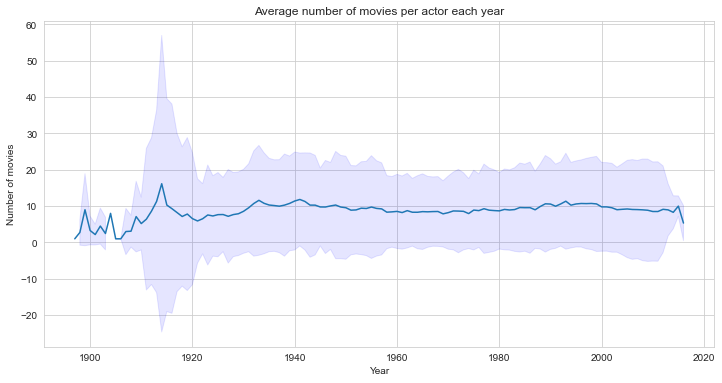

In [38]:
# We also gather the Actor DOB in order to filter out duplicates within actor names
actor_movie_counts_1y = merged_df[['Actor Name', 'Actor DOB', 'Year']]

# Count the movies per year per actor
actor_movie_counts_1y = pd.DataFrame(actor_movie_counts_1y.groupby(['Actor Name', 'Actor DOB', 'Year']).size())
actor_movie_counts_1y.columns = ['Movies per year']
movies_1y = actor_movie_counts_1y.groupby('Year')['Movies per year'].mean()

plt.figure(figsize=(12, 6))

sns.lineplot(x=movies_1y.index, y=movies_1y)
plt.title('Average number of movies per actor each year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.fill_between(movies_1y.index,
                 movies_1y - actor_movie_counts_1y.groupby('Year')['Movies per year'].std(),
                 movies_1y + actor_movie_counts_1y.groupby('Year')['Movies per year'].std(),
                 color='blue', alpha=0.1)
plt.grid(True)
plt.show()

In [39]:
# "easiest way" due to multi-index
# Creation of columns for each year, which symbolize the years for which the movie will be relevant (i.e. current one and 4 next years)
actor_movie_counts_1y['y'] = actor_movie_counts_1y.index.get_level_values('Year')
actor_movie_counts_1y['y+1'] = actor_movie_counts_1y['y']+1
actor_movie_counts_1y['y+2'] = actor_movie_counts_1y['y']+2
actor_movie_counts_1y['y+3'] = actor_movie_counts_1y['y']+3
actor_movie_counts_1y['y+4'] = actor_movie_counts_1y['y']+4

# Movies per year for each y+i
amc_y1 = actor_movie_counts_1y.reset_index().set_index(['Actor Name', 'Actor DOB', 'y+1'])[['Movies per year']]
amc_y1 = amc_y1.rename_axis(index={'y+1': 'Year'})
amc_y1.columns = ['y-1']

amc_y2 = actor_movie_counts_1y.reset_index().set_index(['Actor Name', 'Actor DOB', 'y+2'])[['Movies per year']]
amc_y2 = amc_y2.rename_axis(index={'y+2': 'Year'})
amc_y2.columns = ['y-2']

amc_y3 = actor_movie_counts_1y.reset_index().set_index(['Actor Name', 'Actor DOB', 'y+3'])[['Movies per year']]
amc_y3 = amc_y3.rename_axis(index={'y+3': 'Year'})
amc_y3.columns = ['y-3']

amc_y4 = actor_movie_counts_1y.reset_index().set_index(['Actor Name', 'Actor DOB', 'y+4'])[['Movies per year']]
amc_y4 = amc_y4.rename_axis(index={'y+4': 'Year'})
amc_y4.columns = ['y-4']

amc_y0 = actor_movie_counts_1y.copy(deep=True)

# Merge all lagging year variables into one DF
amc_y0 = pd.merge(amc_y0, amc_y1, how='left', on=['Actor Name', 'Actor DOB', 'Year'])
amc_y0 = pd.merge(amc_y0, amc_y2, how='left', on=['Actor Name', 'Actor DOB', 'Year'])
amc_y0 = pd.merge(amc_y0, amc_y3, how='left', on=['Actor Name', 'Actor DOB', 'Year'])
amc_y0 = pd.merge(amc_y0, amc_y4, how='left', on=['Actor Name', 'Actor DOB', 'Year'])


amc_y0[['y-1', 'y-2', 'y-3', 'y-4']] = amc_y0[['y-1', 'y-2', 'y-3', 'y-4']].fillna(0.0)

# Sum those lagging years to get the lagging 5y variable
amc_y0['Movies per 5y'] = amc_y0['Movies per year'] + amc_y0['y-1'] + amc_y0['y-2'] + amc_y0['y-3'] + amc_y0['y-4']

# We also keep the Movies per year
actor_movie_counts_5y = amc_y0[['Movies per year', 'Movies per 5y']]
actor_movie_counts_5y.head()

Movies per year  Movies per 5y
Actor Name            Actor DOB  Year                                  
 Cesarine Prinz\t     1883-12-20 1922.0                1            1.0
                                 1926.0                1            2.0
 Daniel Newman        1976-05-12 1998.0                1            1.0
'King Kong' Kashey    1903-11-28 1943.0                1            1.0
'Little Billy' Rhodes 1895-02-01 1932.0                1            1.0

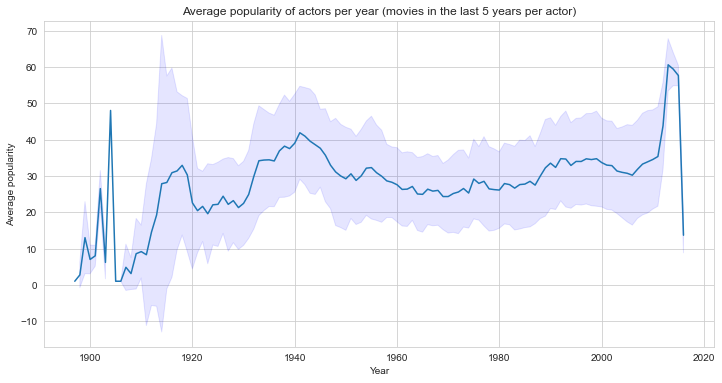

In [40]:
movies_5y = actor_movie_counts_5y.groupby('Year')['Movies per 5y'].mean()

plt.figure(figsize=(12, 6))

sns.lineplot(x=movies_5y.index, y=movies_5y)
plt.title('Average popularity of actors per year (movies in the last 5 years per actor)')
plt.xlabel('Year')
plt.ylabel('Average popularity')
plt.fill_between(movies_5y.index,
                 movies_5y - actor_movie_counts_5y.groupby('Year')['Movies per year'].std(),
                 movies_5y + actor_movie_counts_5y.groupby('Year')['Movies per year'].std(),
                 color='blue', alpha=0.1)
plt.grid(True)
plt.show()

In [41]:
# Addition of new information to merged_df
amc_5y_reset = actor_movie_counts_5y.reset_index()
merged_df = pd.merge(merged_df, amc_5y_reset, how='left', on=['Actor Name', 'Actor DOB', 'Year'])
merged_df.head()

,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Wikipedia movie ID,Character Name,...,Actor height,Actor ethnicity,Actor Name,Actor age at movie release,Umbrella Genre,Total Movies,Typecasting,Year,Movies per year,Movies per 5y
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",975900.0,Akooshay,...,1.62,NaN,Wanda De Jesus,42.0,"[Horror, Action, SF and Fantasy, Thriller]",8.0,NaN,2001.0,2.0,2.0
1,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",975900.0,Lieutenant Melanie Ballard,...,1.78,/m/044038p,Natasha Henstridge,27.0,"[Horror, Action, SF and Fantasy, Thriller]",23.0,False,2001.0,20.0,70.0
2,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",975900.0,Lieutenant Melanie Ballard,...,1.78,/m/044038p,Natasha Henstridge,27.0,"[Horror, Action, SF and Fantasy, Thriller]",23.0,False,2001.0,20.0,70.0
3,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",975900.0,Lieutenant Melanie Ballard,...,1.78,/m/044038p,Natasha Henstridge,27.0,"[Horror, Action, SF and Fantasy, Thriller]",23.0,False,2001.0,20.0,70.0
4,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",975900.0,Lieutenant Melanie Ballard,...,1.78,/m/044038p,Natasha Henstridge,27.0,"[Horror, Action, SF and Fantasy, Thriller]",23.0,False,2001.0,20.0,70.0


# 6. Creating movie-related variables

In order to have the data organized in a relevant way for our analysis, we decided to group it within umbrella genres, to make working on it easier. Thus, we use a MultiIndex, with the umbrella genre being the first one.

We decided to keep a movie under all of its umbrella genres, instead of restricting arbitrarily to one genre per movie, to avoid decision bias.

In [42]:
# Explosion of the aggregated DF into umbrella genres, creation of MultiIndex
aggregated_genre_df = aggregated_df.explode('Umbrella Genre').set_index(['Umbrella Genre', 'Wikipedia movie ID'])
aggregated_genre_df.head(10)

,,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor Name,Actor age at movie release,Year,Month,Day,Movie Genre,Number of Genres
Umbrella Genre,Wikipedia movie ID,,,,,,,,,,,,,,,,,,,,
Drama,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...","1965-12-14, 1956, 1958-06-22, 1958-06-22, 1965...","M, M, M, M, M, F, F, F, M, M, M, M, M","1.87, 1.85, 1.85, 1.87, 1.68, 1.73, 1.75, 1.87...","/m/07hwkr, /m/06v41q","Ted Raimi, Ivan Raimi, Bruce Campbell, Bruce C...","26.0, 36.0, 34.0, 34.0, 26.0, 28.0, 27.0, 35.0...",1992,10.0,9.0,Cult,12
SF and Fantasy,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...","1965-12-14, 1956, 1958-06-22, 1958-06-22, 1965...","M, M, M, M, M, F, F, F, M, M, M, M, M","1.87, 1.85, 1.85, 1.87, 1.68, 1.73, 1.75, 1.87...","/m/07hwkr, /m/06v41q","Ted Raimi, Ivan Raimi, Bruce Campbell, Bruce C...","26.0, 36.0, 34.0, 34.0, 26.0, 28.0, 27.0, 35.0...",1992,10.0,9.0,Cult,12
Niche/Other,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...","1965-12-14, 1956, 1958-06-22, 1958-06-22, 1965...","M, M, M, M, M, F, F, F, M, M, M, M, M","1.87, 1.85, 1.85, 1.87, 1.68, 1.73, 1.75, 1.87...","/m/07hwkr, /m/06v41q","Ted Raimi, Ivan Raimi, Bruce Campbell, Bruce C...","26.0, 36.0, 34.0, 34.0, 26.0, 28.0, 27.0, 35.0...",1992,10.0,9.0,Cult,12
Comedy,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...","1965-12-14, 1956, 1958-06-22, 1958-06-22, 1965...","M, M, M, M, M, F, F, F, M, M, M, M, M","1.87, 1.85, 1.85, 1.87, 1.68, 1.73, 1.75, 1.87...","/m/07hwkr, /m/06v41q","Ted Raimi, Ivan Raimi, Bruce Campbell, Bruce C...","26.0, 36.0, 34.0, 34.0, 26.0, 28.0, 27.0, 35.0...",1992,10.0,9.0,Cult,12
Action,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...","1965-12-14, 1956, 1958-06-22, 1958-06-22, 1965...","M, M, M, M, M, F, F, F, M, M, M, M, M","1.87, 1.85, 1.85, 1.87, 1.68, 1.73, 1.75, 1.87...","/m/07hwkr, /m/06v41q","Ted Raimi, Ivan Raimi, Bruce Campbell, Bruce C...","26.0, 36.0, 34.0, 34.0, 26.0, 28.0, 27.0, 35.0...",1992,10.0,9.0,Cult,12
Horror,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...","1965-12-14, 1956, 1958-06-22, 1958-06-22, 1965...","M, M, M, M, M, F, F, F, M, M, M, M, M","1.87, 1.85, 1.85, 1.87, 1.68, 1.73, 1.75, 1.87...","/m/07hwkr, /m/06v41q","Ted Raimi, Ivan Raimi, Bruce Campbell, Bruce C...","26.0, 36.0, 34.0, 34.0, 26.0, 28.0, 27.0, 35.0...",1992,10.0,9.0,Cult,12
Historical/War,3333.0,/m/0151l,The Birth of a Nation,1915,50000000.0,190.0,"Silent film, English Language",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",,"1893-10-14, 1878-03-16, 1894-11-09, 1868-04-16...","F, M, F, M, M, F, M, M, M, M, F, F, F, M","1.66, 1.6, 1.8, 1.6",/m/07bch9,"Lillian Gish, Henry B. Walthall, Mae Marsh, Sp...",11.0,1915,NaN,NaN,Silent film,7
Drama,3333.0,/m/0151l,The Birth of a Nation,1915,50000000.0,190.0,"Silent film, English Language",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",,"1893-10-14, 1878-03-16, 1894-11-09, 1868-0

## 6.1 Gender representation

#### First, we have a look at male and female character percentage over years.

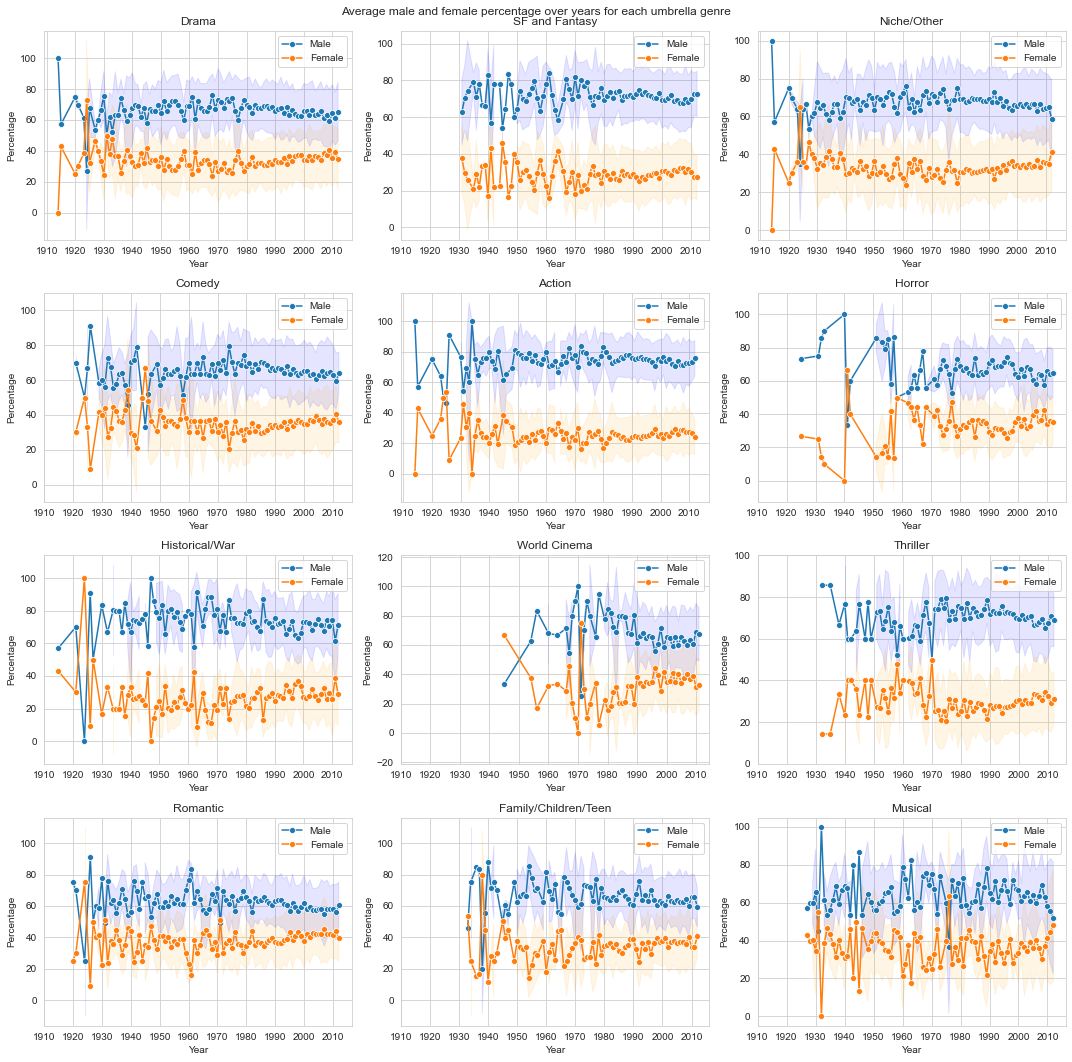

In [43]:
# Split 'Actor gender' column into individual values
aggregated_df['Actor Genders'] = aggregated_df['Actor gender'].str.split(', ')
aggregated_genre_df['Actor Genders'] = aggregated_genre_df['Actor gender'].str.split(', ')
# Count occurrences of 'M' and 'F' for each movie
aggregated_df['Male Count'] = aggregated_df['Actor Genders'].apply(lambda x: x.count('M'))
aggregated_genre_df['Male Count'] = aggregated_genre_df['Actor Genders'].apply(lambda x: x.count('M'))
aggregated_df['Female Count'] = aggregated_df['Actor Genders'].apply(lambda x: x.count('F'))
aggregated_genre_df['Female Count'] = aggregated_genre_df['Actor Genders'].apply(lambda x: x.count('F'))


# Calculate the total count and percentages for each movie
aggregated_df['Total'] = aggregated_df['Male Count'] + aggregated_df['Female Count']
aggregated_df['Male Percentage'] = (aggregated_df['Male Count'] / aggregated_df['Total']) * 100
aggregated_df['Female Percentage'] = (aggregated_df['Female Count'] / aggregated_df['Total']) * 100
aggregated_genre_df['Total'] = aggregated_genre_df['Male Count'] + aggregated_genre_df['Female Count']
aggregated_genre_df['Male Percentage'] = (aggregated_genre_df['Male Count'] / aggregated_genre_df['Total']) * 100
aggregated_genre_df['Female Percentage'] = (aggregated_genre_df['Female Count'] / aggregated_genre_df['Total']) * 100

umbrella_genres = aggregated_genre_df.index.get_level_values('Umbrella Genre').unique()
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Average male and female percentage over years for each umbrella genre')

axs = axs.flatten()
# Loop through each umbrella genre and create line plots with standard deviation for each subplot
for i, genre in enumerate(umbrella_genres):
    genre_df = aggregated_genre_df.loc[genre]
    
    gender_stats = genre_df.groupby('Year')[['Male Percentage', 'Female Percentage']].agg(['mean', 'std'])
    # Plotting average percentages
    sns.lineplot(data=gender_stats['Male Percentage']['mean'], ax=axs[i], label='Male', marker='o')
    sns.lineplot(data=gender_stats['Female Percentage']['mean'], ax=axs[i], label='Female', marker='o')    
    
    axs[i].fill_between(gender_stats.index,
                 gender_stats['Male Percentage']['mean'] - gender_stats['Male Percentage']['std'],
                 gender_stats['Male Percentage']['mean'] + gender_stats['Male Percentage']['std'],
                 color='blue', alpha=0.1)

    
    axs[i].fill_between(gender_stats.index,
                 gender_stats['Female Percentage']['mean'] - gender_stats['Female Percentage']['std'],
                 gender_stats['Female Percentage']['mean'] + gender_stats['Female Percentage']['std'],
                 color='orange', alpha=0.1)
    axs[i].set_xticks(range(10*(aggregated_df['Year'].min()//10), 10*(aggregated_df['Year'].max()//10 + 1), 10))
    axs[i].set_title(genre)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Percentage')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


#### Then, we have a look at scatter plot of female character percentage and inflation adjusted box office revenue.

In [44]:
inflation_dataset_filepath = "https://drive.google.com/uc?id=1PKuY_xJMWtZnKihEHM82jIXwz6ySaSCl"

inflation_colnames = [
    "Year",
    "avg_CPI",
]
df_inflation = pd.read_csv(inflation_dataset_filepath,names=inflation_colnames,delimiter=";")
df_inflation.head()

,Year,avg_CPI
0,1913,9.9
1,1914,10.0
2,1915,10.1
3,1916,10.9
4,1917,12.8


In [45]:

def adjust_for_inflation(box_office_df, adjustment_year, cpi_df):
    """
    Adjusts box office revenues for inflation.

    Args:
        box_office_df (pd.DataFrame): DataFrame with box office revenues and years.
        adjustment_year (int): The year to which you want to adjust the revenues.
        cpi_df (pd.DataFrame): DataFrame with year and average CPI data.

    Returns:
        pd.Series: Adjusted revenues for inflation.
    """
    # Merge the box office DataFrame with the CPI DataFrame on the 'Year' column
    merged_bo_df = box_office_df.merge(cpi_df, on='Year', how='left')

    # Calculate the CPI ratio for each year over the adjustment year
    merged_bo_df['cpi_ratio'] = merged_bo_df.loc[merged_bo_df['Year'] == adjustment_year, 'avg_CPI'].values[0] / merged_bo_df['avg_CPI']

    # Adjust revenues for inflation by multiplying with the CPI ratio
    merged_bo_df['Adjusted revenues'] = merged_bo_df['Movie box office revenue'] * merged_bo_df['cpi_ratio']

    # Create a copy of the adjusted revenues Series
    adjusted_revenues = merged_bo_df['Adjusted revenues'].copy()

    return adjusted_revenues

adjusted_revenues = adjust_for_inflation(aggregated_df[['Year', 'Movie box office revenue']], aggregated_df['Year'].max(),df_inflation)
adjusted_revenues.head()

0    3.518826e+07
1    1.136604e+09
2    7.884619e+07
3    5.565210e+08
4    1.791342e+07
Name: Adjusted revenues, dtype: float64

In [46]:
# Insert the 'inf_adj_movie_box_office_revenue' column right after 'movie_box_office_revenue'
position = aggregated_df.columns.get_loc("Movie box office revenue")
aggregated_df.insert(position + 1, 'Inf adj movie box office revenue', adjusted_revenues.values)
aggregated_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Inf adj movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,...,Day,Movie Genre,Number of Genres,Umbrella Genre,Actor Genders,Male Count,Female Count,Total,Male Percentage,Female Percentage
0,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...",...,9.0,Cult,12,"[Drama, SF and Fantasy, Niche/Other, Comedy, A...","[M, M, M, M, M, F, F, F, M, M, M, M, M]",10,3,13,76.923077,23.076923
1,3333.0,/m/0151l,The Birth of a Nation,1915,50000000.0,1.136604e+09,190.0,"Silent film, English Language",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",...,NaN,Silent film,7,"[Historical/War, Drama, Niche/Other, Action]","[F, M, F, M, M, F, M, M, M, M, F, F, F, M]",8,6,14,57.142857,42.857143
2,3746.0,/m/017n9,Blade Runner,1982-06-25,33139618.0,7.884619e+07,116.0,"Japanese Language, Cantonese, English Language...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...",...,25.0,Thriller,12,"[Drama, SF and Fantasy, World Cinema, Niche/Ot...","[M, M, M, F, F, F, M, M, M, M, M, M, M, M]",11,3,14,78.571429,21.428571
3,3837.0,/m/018f8,Blazing Saddles,1974-02-07,119500000.0,5.565210e+08,93.0,"Yiddish Language, English Language",United States of America,"Western, Satire, Comedy",...,7.0,Western,3,"[Comedy, Niche/Other, Action]","[M, M, M, M, M, M, M, M, M, F, M, M, M, M, F, ...",18,2,20,90.000000,10.000000
4,3947.0,/m/0191n,Blue Velvet,1986-08,8551228.0,1.791342e+07,120.0,English Language,United States of America,"Thriller, Mystery, Crime Fiction",...,NaN,Thriller,3,"[SF and Fantasy, Niche/Other, Thriller]","[M, F, M, M, F, F, M, M, F, F, M, M, M, M, M]",10,5,15,66.666667,33.333333


In [47]:
#Do inf adjustment for aggregated_genre_df also
adjusted_revenues = adjust_for_inflation(aggregated_genre_df[['Year', 'Movie box office revenue']], aggregated_genre_df['Year'].max(),df_inflation)
position = aggregated_genre_df.columns.get_loc("Movie box office revenue")
aggregated_genre_df.insert(position + 1, 'Inf adj movie box office revenue', adjusted_revenues.values)
aggregated_genre_df.head()

,,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Inf adj movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Character Name,...,Month,Day,Movie Genre,Number of Genres,Actor Genders,Male Count,Female Count,Total,Male Percentage,Female Percentage
Umbrella Genre,Wikipedia movie ID,,,,,,,,,,,,,,,,,,,,,
Drama,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...",...,10.0,9.0,Cult,12,"[M, M, M, M, M, F, F, F, M, M, M, M, M]",10,3,13,76.923077,23.076923
SF and Fantasy,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...",...,10.0,9.0,Cult,12,"[M, M, M, M, M, F, F, F, M, M, M, M, M]",10,3,13,76.923077,23.076923
Niche/Other,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...",...,10.0,9.0,Cult,12,"[M, M, M, M, M, F, F, F, M, M, M, M, M]",10,3,13,76.923077,23.076923
Comedy,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...",...,10.0,9.0,Cult,12,"[M, M, M, M, M, F, F, F, M, M, M, M, M]",10,3,13,76.923077,23.076923
Action,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...",...,10.0,9.0,Cult,12,"[M, M, M, M, M, F, F, F, M, M, M, M, M]",10,3,13,76.923077,23.076923


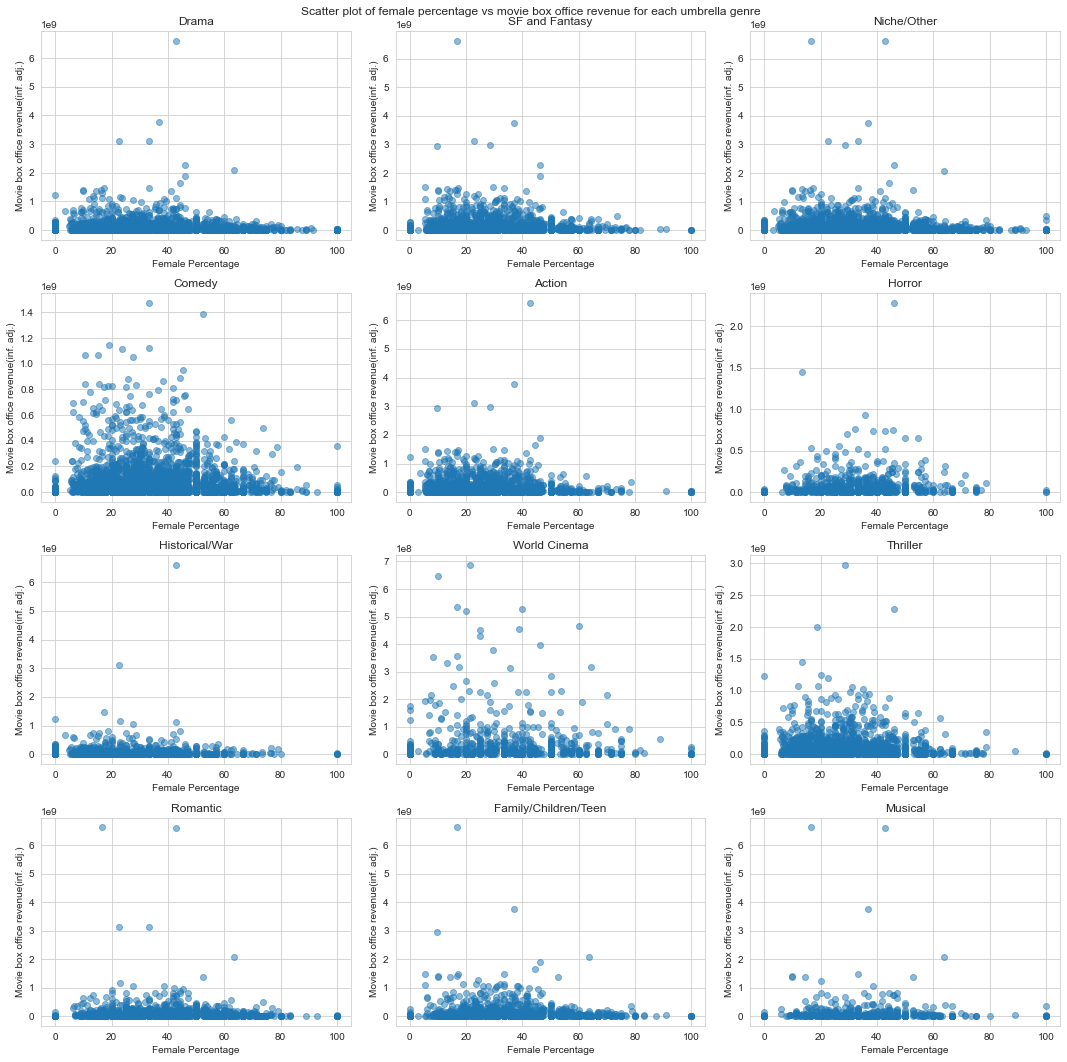

In [48]:
# Get the unique umbrella genres
umbrella_genres = aggregated_genre_df.index.get_level_values('Umbrella Genre').unique()
df_cleaned_box_office = aggregated_genre_df.dropna(subset=["Inf adj movie box office revenue"])
# Creating a 4x3 subplot grid for each genre
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Scatter plot of female percentage vs movie box office revenue for each umbrella genre')

# Loop through each umbrella genre and create a scatter plot for each
for i, genre in enumerate(umbrella_genres):
    row = i // 3  
    col = i % 3    
    
    # Filter the DataFrame for the specific umbrella genre
    genre_df = df_cleaned_box_office.loc[genre]
    
    # Scatter plot of Number of Languages vs Movie Box Office Revenue for the genre
    axs[row, col].scatter(genre_df['Female Percentage'], genre_df['Inf adj movie box office revenue'], alpha=0.5)
    axs[row, col].set_title(genre)
    axs[row, col].set_xlabel('Female Percentage')
    axs[row, col].set_ylabel('Movie box office revenue(inf. adj.)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## 6.2 Diversity of ethnicities

In [49]:
# Count amount of ethnicities, with a minimum of 1
aggregated_df["Number of ethnicities"] = aggregated_df["Actor ethnicity"].str.count(",").fillna(0) +1
aggregated_genre_df["Number of ethnicities"] = aggregated_genre_df["Actor ethnicity"].str.count(",").fillna(0) +1

aggregated_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Inf adj movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,...,Movie Genre,Number of Genres,Umbrella Genre,Actor Genders,Male Count,Female Count,Total,Male Percentage,Female Percentage,Number of ethnicities
0,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...",...,Cult,12,"[Drama, SF and Fantasy, Niche/Other, Comedy, A...","[M, M, M, M, M, F, F, F, M, M, M, M, M]",10,3,13,76.923077,23.076923,2
1,3333.0,/m/0151l,The Birth of a Nation,1915,50000000.0,1.136604e+09,190.0,"Silent film, English Language",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",...,Silent film,7,"[Historical/War, Drama, Niche/Other, Action]","[F, M, F, M, M, F, M, M, M, M, F, F, F, M]",8,6,14,57.142857,42.857143,1
2,3746.0,/m/017n9,Blade Runner,1982-06-25,33139618.0,7.884619e+07,116.0,"Japanese Language, Cantonese, English Language...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...",...,Thriller,12,"[Drama, SF and Fantasy, World Cinema, Niche/Ot...","[M, M, M, F, F, F, M, M, M, M, M, M, M, M]",11,3,14,78.571429,21.428571,4
3,3837.0,/m/018f8,Blazing Saddles,1974-02-07,119500000.0,5.565210e+08,93.0,"Yiddish Language, English Language",United States of America,"Western, Satire, Comedy",...,Western,3,"[Comedy, Niche/Other, Action]","[M, M, M, M, M, M, M, M, M, F, M, M, M, M, F, ...",18,2,20,90.000000,10.000000,9
4,3947.0,/m/0191n,Blue Velvet,1986-08,8551228.0,1.791342e+07,120.0,English Language,United States of America,"Thriller, Mystery, Crime Fiction",...,Thriller,3,"[SF and Fantasy, Niche/Other, Thriller]","[M, F, M, M, F, F, M, M, F, F, M, M, M, M, M]",10,5,15,66.666667,33.333333,3


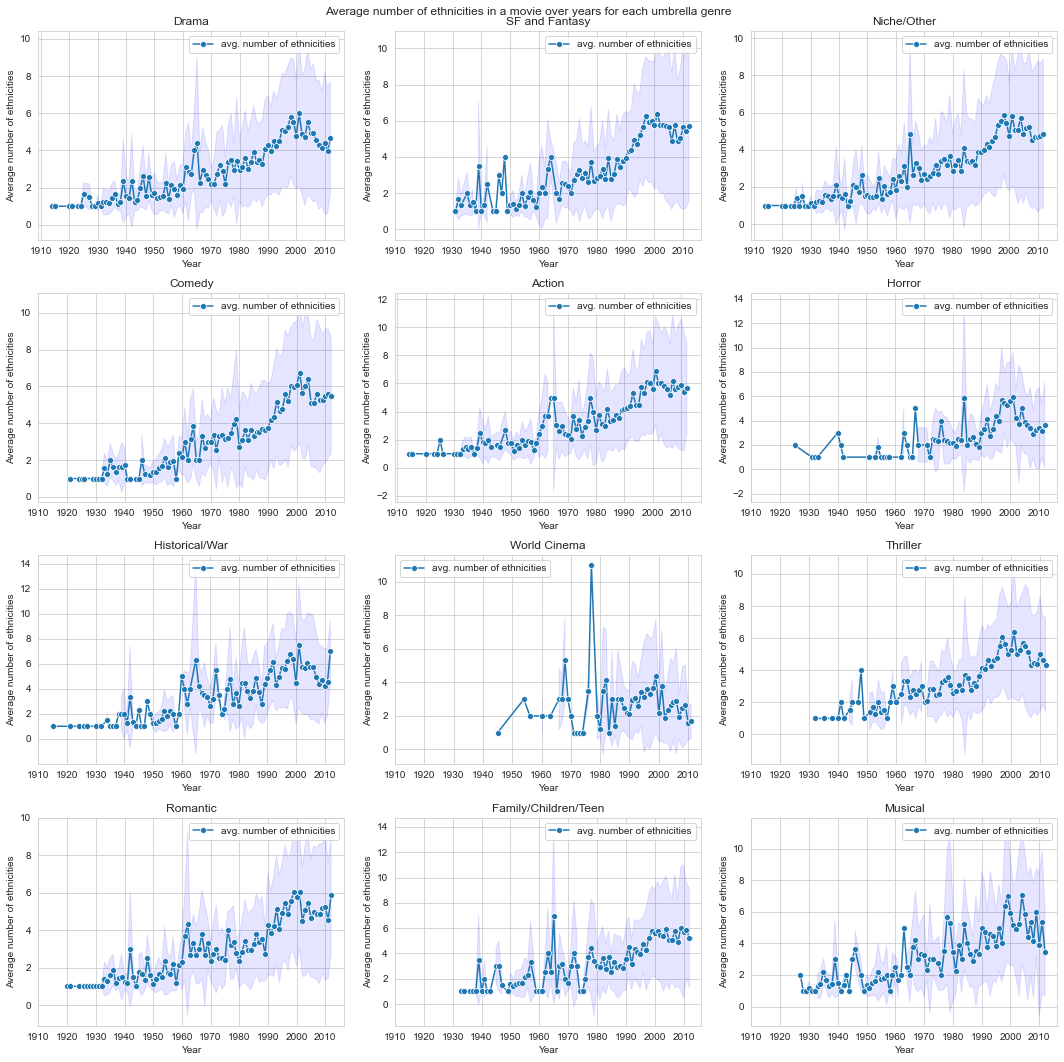

In [50]:
umbrella_genres = aggregated_genre_df.index.get_level_values('Umbrella Genre').unique()
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Average number of ethnicities in a movie over years for each umbrella genre')

axs = axs.flatten()
# Loop through each umbrella genre and create line plots with standard deviation for each subplot
for i, genre in enumerate(umbrella_genres):
    genre_df = aggregated_genre_df.loc[genre]
    
    # Group by year and calculate average and standard deviation of number of ethnicities
    Ethnicity_stats = genre_df.groupby('Year')[['Number of ethnicities']].agg(['mean', 'std'])
    # Plotting average percentages
    sns.lineplot(data=Ethnicity_stats['Number of ethnicities']['mean'], ax=axs[i], label='avg. number of ethnicities', marker='o')    
    
    axs[i].fill_between(Ethnicity_stats.index,
                 Ethnicity_stats['Number of ethnicities']['mean'] - Ethnicity_stats['Number of ethnicities']['std'],
                 Ethnicity_stats['Number of ethnicities']['mean'] + Ethnicity_stats['Number of ethnicities']['std'],
                 color='blue', alpha=0.1)
    axs[i].set_xticks(range(10*(aggregated_df['Year'].min()//10), 10*(aggregated_df['Year'].max()//10 + 1), 10))
    axs[i].set_title(genre)
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average number of ethnicities')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

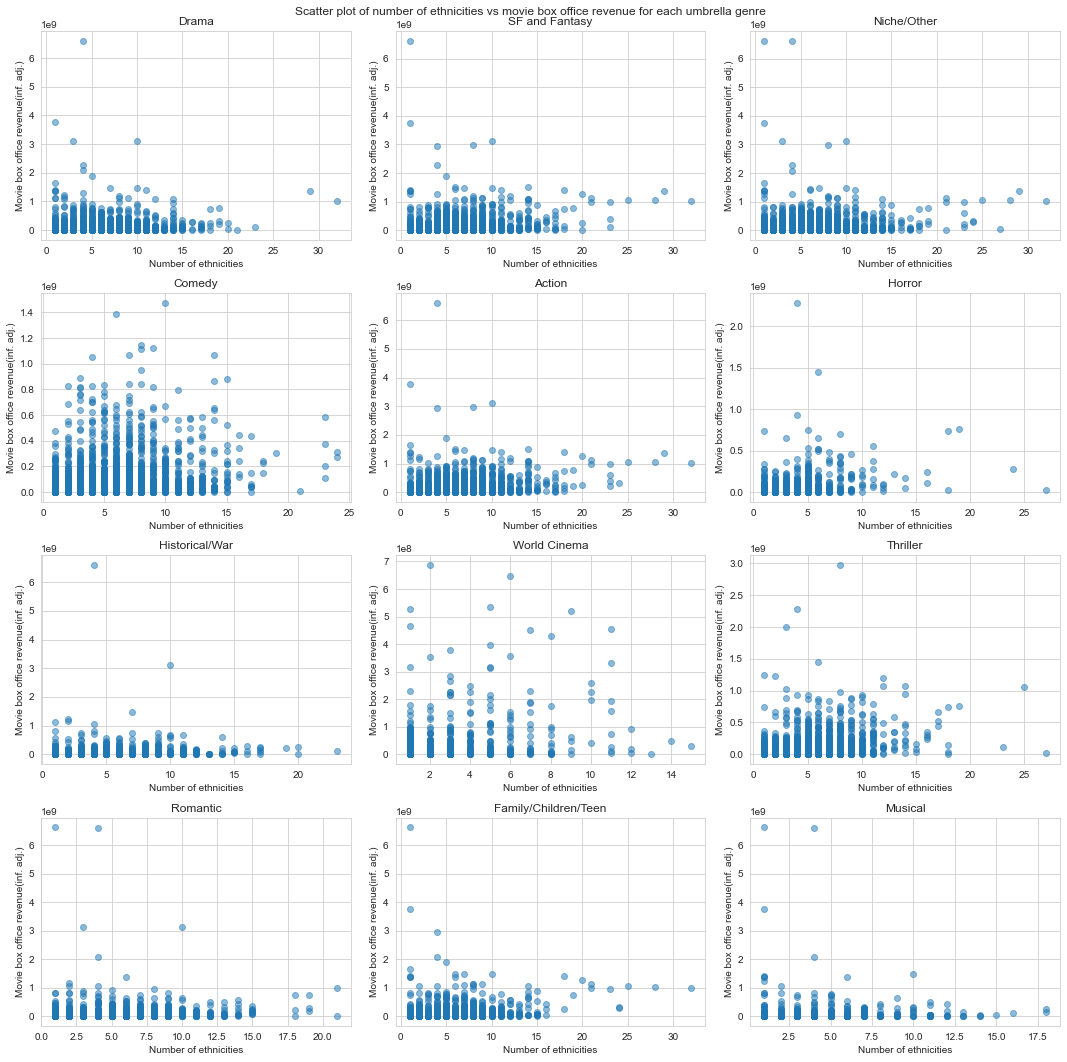

In [51]:
# Get the unique umbrella genres
umbrella_genres = aggregated_genre_df.index.get_level_values('Umbrella Genre').unique()
df_cleaned_box_office = aggregated_genre_df.dropna(subset=["Inf adj movie box office revenue"])
# Creating a 4x3 subplot grid for each genre
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Scatter plot of number of ethnicities vs movie box office revenue for each umbrella genre')

# Loop through each umbrella genre and create a scatter plot for each
for i, genre in enumerate(umbrella_genres):
    row = i // 3  
    col = i % 3    
    
    # Filter the DataFrame for the specific umbrella genre
    genre_df = df_cleaned_box_office.loc[genre]
    
    # Scatter plot of Number of Languages vs Movie Box Office Revenue for the genre
    axs[row, col].scatter(genre_df['Number of ethnicities'], genre_df['Inf adj movie box office revenue'], alpha=0.5)
    axs[row, col].set_title(genre)
    axs[row, col].set_xlabel('Number of ethnicities')
    axs[row, col].set_ylabel('Movie box office revenue(inf. adj.)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## 6.3 Number of languages

In [52]:
# Create a new column of "Number of languages" i,e number of commas +1
aggregated_df["Number of languages"] = aggregated_df["Movie languages"].str.count(",").fillna(0) +1
aggregated_genre_df["Number of languages"] = aggregated_genre_df["Movie languages"].str.count(",").fillna(0) +1
aggregated_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Inf adj movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,...,Number of Genres,Umbrella Genre,Actor Genders,Male Count,Female Count,Total,Male Percentage,Female Percentage,Number of ethnicities,Number of languages
0,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...",...,12,"[Drama, SF and Fantasy, Niche/Other, Comedy, A...","[M, M, M, M, M, F, F, F, M, M, M, M, M]",10,3,13,76.923077,23.076923,2,1
1,3333.0,/m/0151l,The Birth of a Nation,1915,50000000.0,1.136604e+09,190.0,"Silent film, English Language",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",...,7,"[Historical/War, Drama, Niche/Other, Action]","[F, M, F, M, M, F, M, M, M, M, F, F, F, M]",8,6,14,57.142857,42.857143,1,2
2,3746.0,/m/017n9,Blade Runner,1982-06-25,33139618.0,7.884619e+07,116.0,"Japanese Language, Cantonese, English Language...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...",...,12,"[Drama, SF and Fantasy, World Cinema, Niche/Ot...","[M, M, M, F, F, F, M, M, M, M, M, M, M, M]",11,3,14,78.571429,21.428571,4,5
3,3837.0,/m/018f8,Blazing Saddles,1974-02-07,119500000.0,5.565210e+08,93.0,"Yiddish Language, English Language",United States of America,"Western, Satire, Comedy",...,3,"[Comedy, Niche/Other, Action]","[M, M, M, M, M, M, M, M, M, F, M, M, M, M, F, ...",18,2,20,90.000000,10.000000,9,2
4,3947.0,/m/0191n,Blue Velvet,1986-08,8551228.0,1.791342e+07,120.0,English Language,United States of America,"Thriller, Mystery, Crime Fiction",...,3,"[SF and Fantasy, Niche/Other, Thriller]","[M, F, M, M, F, F, M, M, F, F, M, M, M, M, M]",10,5,15,66.666667,33.333333,3,1


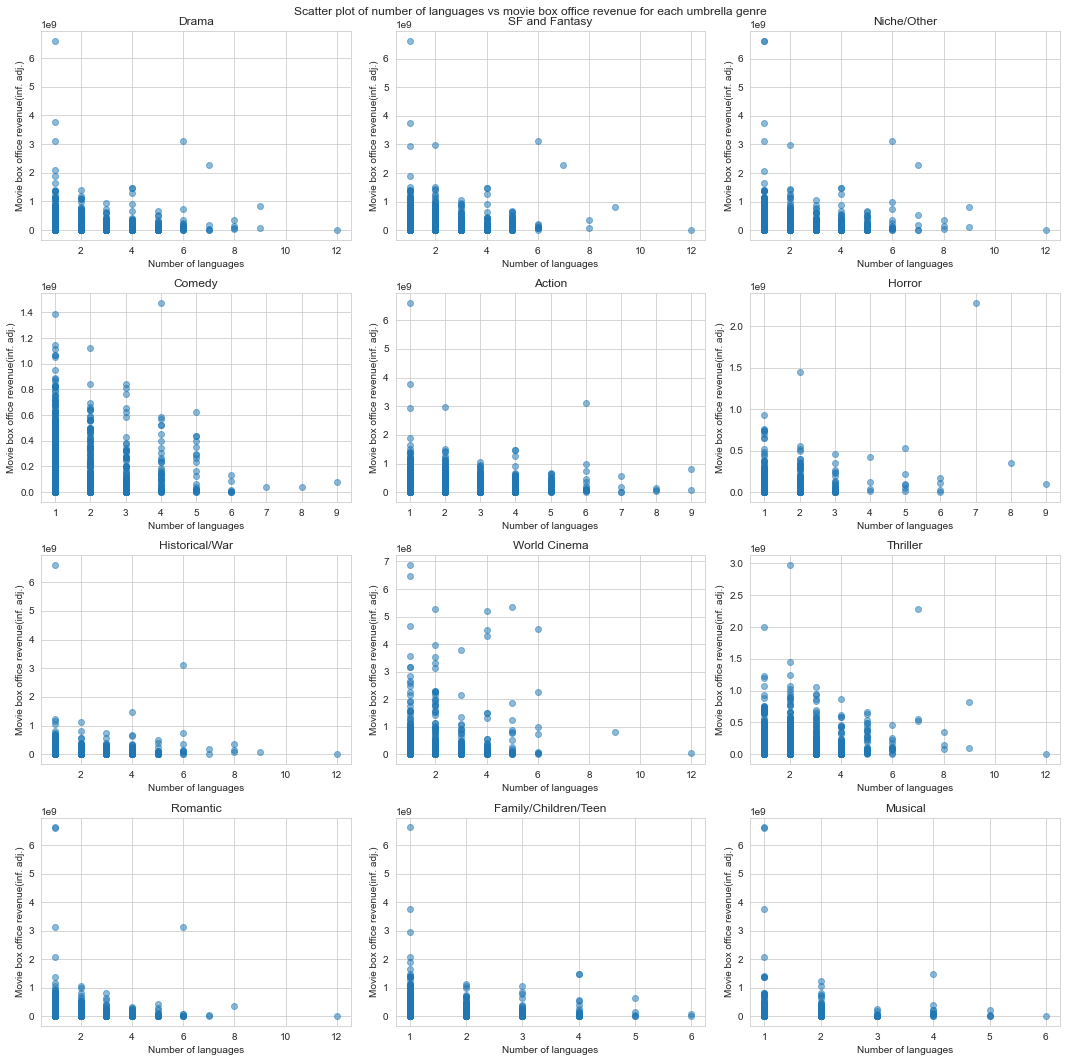

In [53]:
# Get the unique umbrella genres
umbrella_genres = aggregated_genre_df.index.get_level_values('Umbrella Genre').unique()
df_cleaned_box_office = aggregated_genre_df.dropna(subset=["Movie box office revenue"])
# Creating a 4x3 subplot grid for each genre
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Scatter plot of number of languages vs movie box office revenue for each umbrella genre')

# Loop through each umbrella genre and create a scatter plot for each
for i, genre in enumerate(umbrella_genres):
    row = i // 3  
    col = i % 3    
    
    # Filter the DataFrame for the specific umbrella genre
    genre_df = df_cleaned_box_office.loc[genre]
    
    # Scatter plot of Number of Languages vs Movie Box Office Revenue for the genre
    axs[row, col].scatter(genre_df['Number of languages'], genre_df['Inf adj movie box office revenue'], alpha=0.5)
    axs[row, col].set_title(genre)
    axs[row, col].set_xlabel('Number of languages')
    axs[row, col].set_ylabel('Movie box office revenue(inf. adj.)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## 6.4 Economic analysis

Use of unemployment in the US as a proxy

In [54]:
file_path = "https://drive.google.com/uc?id=132iEpmSgrr6qVglpHnQV-Vs7b9m20KUw"
# Read file into a DataFrame
df_macro = pd.read_csv(file_path, sep= ';')

In [55]:
for column in df_macro.columns:
    if column != 'Year':
        df_macro[column] = df_macro[column].str.replace(',','.').astype(float)

# Renaming months to match parent dataset, using a map
month_map = {
  "Year": 'Year',
  "Jan": 1,
  "Feb": 2,
  "Mar": 3,
  "Apr": 4,
  "May": 5,
  "Jun": 6,
  "Jul": 7,
  "Aug": 8,
  "Sep": 9,
  "Oct": 10,
  "Nov": 11,
  "Dec": 12
}

df_macro = df_macro.rename(mapper=month_map, axis= 'columns')
# Use of melt to get the data in appropriate shape (one column for Year, one for Month)
df_macro = pd.melt(df_macro, id_vars=['Year'], var_name=['Month'], value_name='Unemployment')

In [56]:
aggregated_df = pd.merge(aggregated_df, df_macro, how='left', on=['Year', 'Month'])
aggregated_genre_df = aggregated_genre_df.merge(df_macro, how="left",on=['Year', 'Month']).set_index(aggregated_genre_df.index) 
aggregated_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Inf adj movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,...,Umbrella Genre,Actor Genders,Male Count,Female Count,Total,Male Percentage,Female Percentage,Number of ethnicities,Number of languages,Unemployment
0,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...",...,"[Drama, SF and Fantasy, Niche/Other, Comedy, A...","[M, M, M, M, M, F, F, F, M, M, M, M, M]",10,3,13,76.923077,23.076923,2,1,7.3
1,3333.0,/m/0151l,The Birth of a Nation,1915,50000000.0,1.136604e+09,190.0,"Silent film, English Language",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",...,"[Historical/War, Drama, Niche/Other, Action]","[F, M, F, M, M, F, M, M, M, M, F, F, F, M]",8,6,14,57.142857,42.857143,1,2,NaN
2,3746.0,/m/017n9,Blade Runner,1982-06-25,33139618.0,7.884619e+07,116.0,"Japanese Language, Cantonese, English Language...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...",...,"[Drama, SF and Fantasy, World Cinema, Niche/Ot...","[M, M, M, F, F, F, M, M, M, M, M, M, M, M]",11,3,14,78.571429,21.428571,4,5,9.6
3,3837.0,/m/018f8,Blazing Saddles,1974-02-07,119500000.0,5.565210e+08,93.0,"Yiddish Language, English Language",United States of America,"Western, Satire, Comedy",...,"[Comedy, Niche/Other, Action]","[M, M, M, M, M, M, M, M, M, F, M, M, M, M, F, ...",18,2,20,90.000000,10.000000,9,2,5.2
4,3947.0,/m/0191n,Blue Velvet,1986-08,8551228.0,1.791342e+07,120.0,English Language,United States of America,"Thriller, Mystery, Crime Fiction",...,"[SF and Fantasy, Niche/Other, Thriller]","[M, F, M, M, F, F, M, M, F, F, M, M, M, M, M]",10,5,15,66.666667,33.333333,3,1,6.9


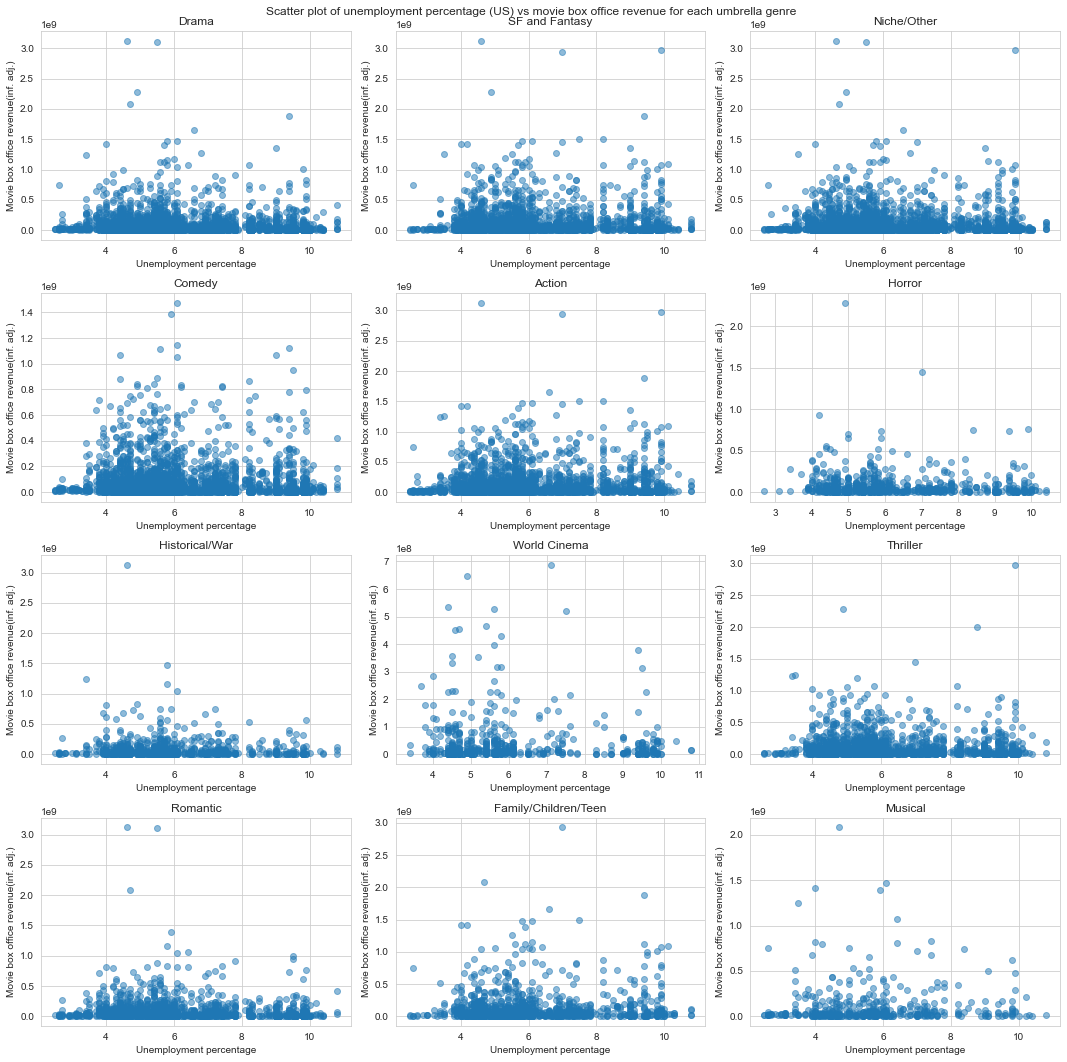

In [57]:
# Get the unique umbrella genres
umbrella_genres = aggregated_genre_df.index.get_level_values('Umbrella Genre').unique()
df_cleaned_box_office = aggregated_genre_df.dropna(subset=["Inf adj movie box office revenue"])
# Creating a 4x3 subplot grid for each genre
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Scatter plot of unemployment percentage (US) vs movie box office revenue for each umbrella genre')

# Loop through each umbrella genre and create a scatter plot for each
for i, genre in enumerate(umbrella_genres):
    row = i // 3  
    col = i % 3    
    
    # Filter the DataFrame for the specific umbrella genre
    genre_df = df_cleaned_box_office.loc[genre]
    
    # Scatter plot of Number of Languages vs Movie Box Office Revenue for the genre
    axs[row, col].scatter(genre_df['Unemployment'], genre_df['Inf adj movie box office revenue'], alpha=0.5)
    axs[row, col].set_title(genre)
    axs[row, col].set_xlabel('Unemployment percentage')
    axs[row, col].set_ylabel('Movie box office revenue(inf. adj.)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## 6.5 Rating variable for movie

We gathered the IMDB data for ratings and movie name metadata (as the unique IMDB identifier is different from the Wikipedia id)

In [58]:
imdb_reviews_dataset_filepath = "https://drive.google.com/uc?id=1JT4vjJ3yfBQlN_-jP11frATj9_9YhOT2"
imdb_names_dataset_filepath = "https://datasets.imdbws.com/title.basics.tsv.gz"

imdb_reviews = pd.read_csv(imdb_reviews_dataset_filepath, sep='\t')
imdb_names = pd.read_csv(imdb_names_dataset_filepath, sep='\t')

In [59]:
imdb_reviews.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2007
1,tt0000002,5.8,269
2,tt0000003,6.5,1912
3,tt0000004,5.5,178
4,tt0000005,6.2,2691


In [60]:
imdb_names.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


We can see that the missing data is denoted by '\N'. Also, for our analysis, since we focus on movies, we can discard the endYear variable, only useful for TV shows etc.

In [61]:
# Use of relevant title types
imdb_names = imdb_names[imdb_names['titleType'].isin(['short', 'movie', 'tvShort', 'tvMovie'])]
# We check that there are no endYears anymore
imdb_names['endYear'].unique()

array(['\\N'], dtype=object)

In [62]:
# we discard all NA values
imdb_df = pd.merge(imdb_names[['tconst', 'primaryTitle', 'originalTitle', 'startYear', 'runtimeMinutes']], imdb_reviews, how='left', on='tconst').dropna()
imdb_df = imdb_df[imdb_df['startYear'] != '\\N']
imdb_df['startYear'] = imdb_df['startYear'].apply(lambda x: int(x))

In [63]:
# We now have a DF with the same shape as the initial df_cleaned, we can also drop the extra information and keep only the ratings, if required
aggregated_df = pd.merge(aggregated_df, imdb_df, how='left', left_on=['Movie name', 'Year'], right_on=['originalTitle', 'startYear'])
aggregated_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Inf adj movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,...,Number of ethnicities,Number of languages,Unemployment,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,averageRating,numVotes
0,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...",...,2,1,7.3,tt0106308,Army of Darkness,Army of Darkness,1992.0,81,7.4,191350.0
1,3333.0,/m/0151l,The Birth of a Nation,1915,50000000.0,1.136604e+09,190.0,"Silent film, English Language",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",...,1,2,NaN,tt0004972,The Birth of a Nation,The Birth of a Nation,1915.0,195,6.2,25924.0
2,3746.0,/m/017n9,Blade Runner,1982-06-25,33139618.0,7.884619e+07,116.0,"Japanese Language, Cantonese, English Language...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...",...,4,5,9.6,tt0083658,Blade Runner,Blade Runner,1982.0,117,8.1,805451.0
3,3837.0,/m/018f8,Blazing Saddles,1974-02-07,119500000.0,5.565210e+08,93.0,"Yiddish Language, English Language",United States of America,"Western, Satire, Comedy",...,9,2,5.2,tt0071230,Blazing Saddles,Blazing Saddles,1974.0,93,7.7,148115.0
4,3947.0,/m/0191n,Blue Velvet,1986-08,8551228.0,1.791342e+07,120.0,English Language,United States of America,"Thriller, Mystery, Crime Fiction",...,3,1,6.9,tt0090756,Blue Velvet,Blue Velvet,1986.0,120,7.7,210800.0


In [64]:
aggregated_genre_df = aggregated_df.explode('Umbrella Genre').set_index(['Umbrella Genre', 'Wikipedia movie ID'])
aggregated_genre_df.head()

,,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Inf adj movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Character Name,...,Number of ethnicities,Number of languages,Unemployment,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,averageRating,numVotes
Umbrella Genre,Wikipedia movie ID,,,,,,,,,,,,,,,,,,,,,
Drama,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...",...,2,1,7.3,tt0106308,Army of Darkness,Army of Darkness,1992.0,81,7.4,191350.0
SF and Fantasy,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...",...,2,1,7.3,tt0106308,Army of Darkness,Army of Darkness,1992.0,81,7.4,191350.0
Niche/Other,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...",...,2,1,7.3,tt0106308,Army of Darkness,Army of Darkness,1992.0,81,7.4,191350.0
Comedy,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...",...,2,1,7.3,tt0106308,Army of Darkness,Army of Darkness,1992.0,81,7.4,191350.0
Action,3217.0,/m/014hr,Army of Darkness,1992-10-09,21502796.0,3.518826e+07,81.0,English Language,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","S-Mart Clerk, Fake shemp, Ash Williams, Evil A...",...,2,1,7.3,tt0106308,Army of Darkness,Army of Darkness,1992.0,81,7.4,191350.0


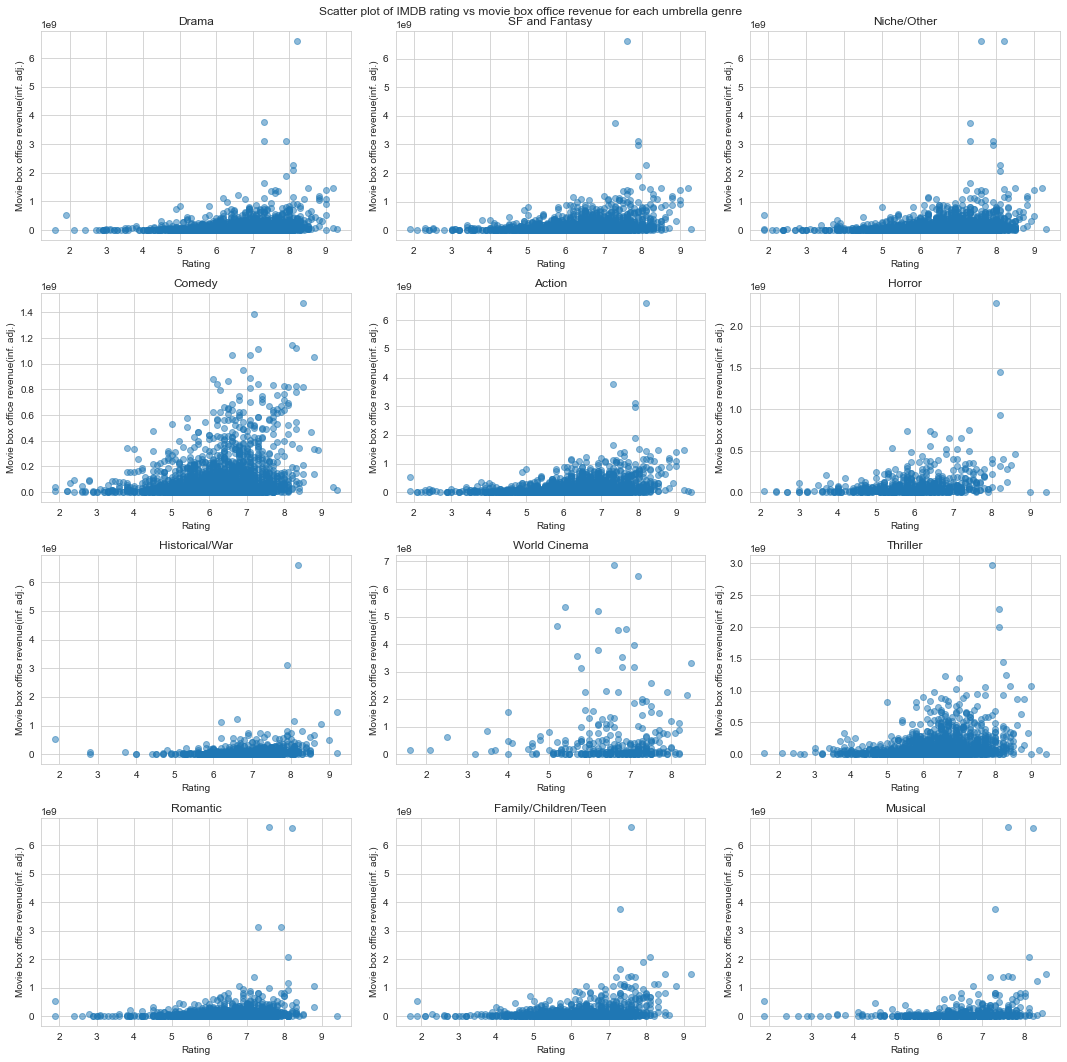

In [65]:
# Get the unique umbrella genres
umbrella_genres = aggregated_genre_df.index.get_level_values('Umbrella Genre').unique()
df_cleaned_box_office = aggregated_genre_df.dropna(subset=["Inf adj movie box office revenue"])
# Creating a 4x3 subplot grid for each genre
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Scatter plot of IMDB rating vs movie box office revenue for each umbrella genre')

# Loop through each umbrella genre and create a scatter plot for each
for i, genre in enumerate(umbrella_genres):
    row = i // 3  
    col = i % 3    
    
    # Filter the DataFrame for the specific umbrella genre
    genre_df = df_cleaned_box_office.loc[genre]
    
    # Scatter plot of Number of Languages vs Movie Box Office Revenue for the genre
    axs[row, col].scatter(genre_df['averageRating'], genre_df['Inf adj movie box office revenue'], alpha=0.5)
    axs[row, col].set_title(genre)
    axs[row, col].set_xlabel('Rating')
    axs[row, col].set_ylabel('Movie box office revenue(inf. adj.)')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# 7. Summary

Now, we have our data organized in DataFrames.

_aggregated_df_ contains all the information for each movie, with some aggregated characteristics.

_aggregated_genre_df_ contains the above information, but using a MultiIndex constructed with the Umbrella Genre and the Wikipedia movie id variables in order to organize the data better.

_actor_movie_counts_5y_ contains the information about an actor's movies for each year and their "popularity", measured by a rolling sum of their movies in the 5 last years. This information is also available in _merged_df_.

_actor_genre_counts_ contains information about each actor's film genres, including Type Casting. This information is also available in _merged_df_.